### Переобучение 


In [1]:
import pandas as pd
import numpy  as np

import matplotlib
import matplotlib.pyplot as plt

In [2]:
print(pd.__version__)
print(np.__version__)
print(matplotlib.__version__)

1.3.0
1.20.3
3.3.4


In [3]:
x_parabola = 50 * np.random.default_rng(100).random((50,))
y_parabola = ((x_parabola - 15) ** 2) + (np.random.default_rng(30).random((50,)) - 0.5) * 100

In [4]:
x_outliers = 50 * np.random.default_rng(80).random((10,))
y_outliers = ((x_outliers - 15) **2) + (np.random.default_rng(500).random((10,)) -0.5) * 750

In [5]:
x_points = np.concatenate((x_parabola, x_outliers), axis = 0)
y_points = np.concatenate((y_parabola, y_outliers), axis = 0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


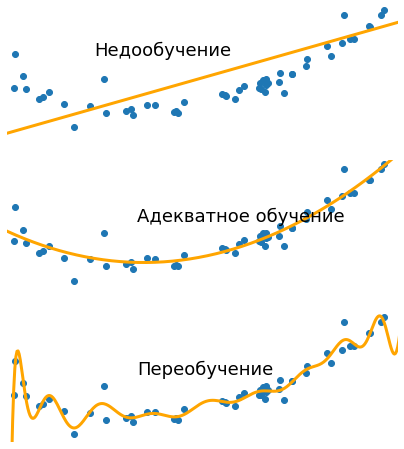

In [6]:
# График недообучения
fig = plt.figure(figsize = (7, 8))
ax = fig.add_subplot(3, 1, 1)
fig_1 = plt.scatter(x = x_points, y = y_points)
plt.axis('off')
x = np.linspace(0, 50, 400) 

ax.text(10,450, 'Недообучение', fontsize = 18)
fit = (np.polyfit(x_points, y_points, 1))
m = fit[0]
c = fit[1]
underfit = (m * x + c)
fig_1 = plt.plot(x, underfit, color = 'orange', linewidth = 3)
ax.set(xlim = (0, 45), ylim = (-200, 850))

# График адекватного обучения
ax = fig.add_subplot(3, 1, 2)
#ax.set_title ("a good fit", fontsize=18)
ax.text(15, 350,'Адекватное обучение', fontsize = 18)
fit = (np.polyfit(x_points, y_points, 2))
a = fit[0]
c = fit[2]
m = fit[1]
goodfit = (a * x ** 2 + m * x + c)
fig_1 = plt.plot(x,goodfit, color = 'orange', linewidth = 3)
fig_1 = plt.scatter(x = x_points, y = y_points)
ax.set(xlim = (0, 45), ylim = (-200, 850))
plt.axis('off')

# График переобучения
ax = fig.add_subplot(3, 1, 3)
# overfit
#ax.set_title ("overfitting", fontsize=18)
ax.text(15, 350, 'Переобучение', fontsize = 18)
fit = (np.polyfit(x_points, y_points, 50))
overfit = np.poly1d(fit)
fig_1 = plt.plot(x,overfit(x), color = 'orange', linewidth = 3)
fig_1 = plt.scatter(x = x_points, y = y_points)
ax.set(xlim = (0, 45), ylim = (-200, 850))
plt.axis('off')
plt.show()